# Exercícios

Você recebeu o arquivo **DESCRITORESMATH.csv**. Ele contém as notas, por descritores, para avaliação das escolas do estado do Ceará. Existe um atributo chamado **'Indicação do Padrão de Desempenho'** que classifica a escola.

Lembrete: É necessário normalizar as variáveis para utilizar o PCA

1. Utilize o PCA e verifique o comportamento da variância explicada como função do número de componentes principais (faça um gráfico).

2. Utilize as duas primeiras componentes principais do PCA em um scatter plot 2D (X,Y). Identifique, pelas cores no scatter plot, os valores da classe relacionado a coluna **Indicação do Padrão de Desempenho**.

3. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto a um modelo de ML escolhido através do PCA. Faça um gráfico.

4. Utilizando o Métodos de Pesos Lineares, identifique a relevância de cada atributo do conjunto de dados em relação a primeira componente principal. Faça um gráfico ($plt.bar$) onde um eixo identifica o atributo, enquanto o outro identifica o peso associado.






In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import gdown
import os

file = 'https://drive.google.com/file/d/1-NIsWOWYCGxbsDXfbE8X-Z7BmKfv1ldv'
output = 'DESCRITORESMATH.csv'

if not os.path.exists(output):
    print(f"File {output} not found. Downloading...")
    fileId = file.split('/')[5]
    url = 'https://drive.google.com/uc?id=' + fileId
    gdown.download(url, output, quiet=False)
else:
    print(f"File {output} already exists. No download needed.")



File DESCRITORESMATH.csv not found. Downloading...


Downloading...
From: https://drive.google.com/uc?id=1-NIsWOWYCGxbsDXfbE8X-Z7BmKfv1ldv
To: /Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Redução de dimensionalidade/exercicios/DESCRITORESMATH.csv
100%|██████████| 419k/419k [00:00<00:00, 1.81MB/s]


In [4]:
df=pd.read_csv('DESCRITORESMATH.csv')

In [5]:
df

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D64,D65,D67,D71,D72,D76,D78,Indicação do Padrão de Desempenho,Município,Escola
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,25.4,27.5,22.8,25.4,28.1,86.4,25.5,Crítico,AQUIRAZ,LIA SIDOU EEM
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,15.0,22.4,20.3,32.7,21.2,86.2,26.0,Crítico,AQUIRAZ,EEM LIA SIDOU
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,33.3,25.4,23.4,17.0,37.1,74.6,40.3,Crítico,AQUIRAZ,EEM LIA SIDOU
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,37.1,28.4,23.5,12.2,28.9,93.8,50.0,Crítico,AQUIRAZ,LIA SIDOU EEMTI
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.0,27.2,20.0,17.6,32.1,82.3,15.1,Muito Crítico,CAUCAIA,EEFM DOM ALOISIO LORSCHEIDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,36.5,30.9,29.5,17.8,27.5,84.1,52.7,Crítico,FORTALEZA,EEM LICEU DO CONJUNTO CEARA
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,33.3,35.0,16.7,35.5,29.4,90.9,41.7,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,35.0,20.6,18.3,20.9,18.0,85.5,23.7,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,35.3,18.0,15.1,10.0,27.5,77.4,38.5,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS


In [6]:
df['Indicação do Padrão de Desempenho'].value_counts()

Indicação do Padrão de Desempenho
Crítico          1710
Muito Crítico     423
Intermediário     306
Adequado           33
Name: count, dtype: int64

In [7]:
def mudarvalor(x):

    if x=='Crítico':
        y=0
    if x=='Muito Crítico':
        y=0
    if x=='Intermediário':
        y=1
    if x=='Adequado':
        y=1
    return y

In [8]:
df['Indicação do Padrão de Desempenho'].apply(mudarvalor)

0       0
1       0
2       0
3       0
4       0
       ..
2467    0
2468    0
2469    0
2470    0
2471    0
Name: Indicação do Padrão de Desempenho, Length: 2472, dtype: int64

In [9]:
df['Indicação do Padrão de Desempenho']=df['Indicação do Padrão de Desempenho'].apply(mudarvalor)

In [10]:
df

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D64,D65,D67,D71,D72,D76,D78,Indicação do Padrão de Desempenho,Município,Escola
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,25.4,27.5,22.8,25.4,28.1,86.4,25.5,0,AQUIRAZ,LIA SIDOU EEM
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,15.0,22.4,20.3,32.7,21.2,86.2,26.0,0,AQUIRAZ,EEM LIA SIDOU
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,33.3,25.4,23.4,17.0,37.1,74.6,40.3,0,AQUIRAZ,EEM LIA SIDOU
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,37.1,28.4,23.5,12.2,28.9,93.8,50.0,0,AQUIRAZ,LIA SIDOU EEMTI
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.0,27.2,20.0,17.6,32.1,82.3,15.1,0,CAUCAIA,EEFM DOM ALOISIO LORSCHEIDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,36.5,30.9,29.5,17.8,27.5,84.1,52.7,0,FORTALEZA,EEM LICEU DO CONJUNTO CEARA
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,33.3,35.0,16.7,35.5,29.4,90.9,41.7,0,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,35.0,20.6,18.3,20.9,18.0,85.5,23.7,0,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,35.3,18.0,15.1,10.0,27.5,77.4,38.5,0,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS


In [11]:
df.drop(['Indicação do Padrão de Desempenho','Município','Escola'],axis=1)

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D56,D57,D58,D64,D65,D67,D71,D72,D76,D78
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,18.2,50.7,16.7,25.4,27.5,22.8,25.4,28.1,86.4,25.5
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,14.9,45.2,16.5,15.0,22.4,20.3,32.7,21.2,86.2,26.0
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,25.8,69.8,27.0,33.3,25.4,23.4,17.0,37.1,74.6,40.3
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,15.1,68.1,29.5,37.1,28.4,23.5,12.2,28.9,93.8,50.0
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.2,41.7,22.2,21.0,27.2,20.0,17.6,32.1,82.3,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,21.1,52.9,25.6,36.5,30.9,29.5,17.8,27.5,84.1,52.7
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,8.0,35.5,12.1,33.3,35.0,16.7,35.5,29.4,90.9,41.7
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,10.6,51.6,20.0,35.0,20.6,18.3,20.9,18.0,85.5,23.7
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,14.3,60.2,29.0,35.3,18.0,15.1,10.0,27.5,77.4,38.5


In [12]:
df['Indicação do Padrão de Desempenho'].value_counts()

Indicação do Padrão de Desempenho
0    2133
1     339
Name: count, dtype: int64

# remover colunas

In [13]:
df.drop(['Município','Escola'],axis=1,inplace=True)

In [14]:
df

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D57,D58,D64,D65,D67,D71,D72,D76,D78,Indicação do Padrão de Desempenho
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,50.7,16.7,25.4,27.5,22.8,25.4,28.1,86.4,25.5,0
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,45.2,16.5,15.0,22.4,20.3,32.7,21.2,86.2,26.0,0
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,69.8,27.0,33.3,25.4,23.4,17.0,37.1,74.6,40.3,0
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,68.1,29.5,37.1,28.4,23.5,12.2,28.9,93.8,50.0,0
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,41.7,22.2,21.0,27.2,20.0,17.6,32.1,82.3,15.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,52.9,25.6,36.5,30.9,29.5,17.8,27.5,84.1,52.7,0
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,35.5,12.1,33.3,35.0,16.7,35.5,29.4,90.9,41.7,0
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,51.6,20.0,35.0,20.6,18.3,20.9,18.0,85.5,23.7,0
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,60.2,29.0,35.3,18.0,15.1,10.0,27.5,77.4,38.5,0


In [15]:
features=df.drop('Indicação do Padrão de Desempenho',axis=1).columns

In [16]:
features

Index(['D16', 'D19', 'D20', 'D24', 'D28', 'D40', 'D42', 'D49', 'D50', 'D51',
       'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D64', 'D65', 'D67',
       'D71', 'D72', 'D76', 'D78'],
      dtype='object')

# ML

In [17]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score
from scipy.optimize import curve_fit

In [18]:
start=time.time()
X=df[features]# dimensoes
y=df['Indicação do Padrão de Desempenho']# alvo
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=42)
clf=LogisticRegression(random_state=42,max_iter=10000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
end=time.time()
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),end-start)

0.982200647249191 0.9290322580645162 0.13556408882141113


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
scaler.fit_transform(df[features])

array([[-0.10809046, -0.37243881, -0.54794935, ..., -0.09435018,
         0.39093665, -0.83761474],
       [-0.64916092, -0.6525533 , -0.46316627, ..., -0.84026541,
         0.36901472, -0.79765936],
       [-0.28051951, -0.5559621 , -0.08769835, ...,  0.87858274,
        -0.90245721,  0.34506448],
       ...,
       [-0.36376112, -1.01959989, -1.02031221, ..., -1.18619711,
         0.29228796, -0.9814541 ],
       [ 0.35568422,  0.31335875, -0.88708166, ..., -0.15921237,
        -0.59555019,  0.20122512],
       [ 0.08217607,  0.73836006, -0.1482577 , ...,  1.62449797,
         0.21556121,  1.20010959]])

In [21]:
dfscaler=pd.DataFrame(data=scaler.fit_transform(df[features]),columns=features)

In [22]:
df.describe()

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D57,D58,D64,D65,D67,D71,D72,D76,D78,Indicação do Padrão de Desempenho
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,...,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,34.917921,37.655825,24.524070,28.370024,22.495267,23.200162,41.867516,30.829895,26.980866,28.143285,...,54.088673,28.329612,28.181189,31.375566,26.871238,23.879288,28.972775,82.833374,35.981877,0.137136
std,16.821915,10.355004,8.258035,9.136547,10.408871,13.484503,14.772904,8.407228,9.385708,8.912816,...,13.008794,9.901749,10.015006,10.900670,11.807464,9.129457,9.252252,9.125130,12.516492,0.344060
min,0.000000,11.100000,0.000000,4.700000,0.000000,0.000000,9.500000,0.000000,0.000000,5.600000,...,19.000000,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,40.600000,0.000000,0.000000
25%,22.700000,30.600000,19.500000,22.400000,15.775000,14.200000,31.100000,24.800000,20.800000,22.500000,...,44.700000,21.600000,21.200000,24.100000,19.200000,17.100000,22.800000,76.800000,26.800000,0.000000
50%,29.950000,35.600000,23.000000,26.400000,20.000000,19.800000,38.800000,29.800000,24.800000,26.600000,...,51.800000,26.400000,26.700000,28.800000,23.850000,22.600000,27.300000,83.300000,34.150000,0.000000
75%,43.500000,42.700000,27.400000,32.400000,26.600000,27.900000,49.100000,36.325000,30.900000,31.600000,...,62.000000,32.700000,33.300000,36.100000,30.900000,29.525000,33.025000,89.800000,42.700000,0.000000
max,97.500000,93.200000,92.000000,80.600000,85.700000,94.900000,96.500000,73.800000,83.300000,87.900000,...,96.400000,78.500000,85.500000,83.300000,93.800000,63.700000,75.900000,100.000000,87.000000,1.000000


In [23]:
dfscaler.describe()

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D56,D57,D58,D64,D65,D67,D71,D72,D76,D78
count,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,...,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03
mean,-1.149746e-16,3.707929e-16,1.667131e-16,-3.183358e-16,-9.485401e-17,1.379695e-16,-7.257769e-17,-6.467319e-17,-6.151139e-16,3.190544e-16,...,-3.133057e-16,-2.960595e-16,-2.701902e-16,8.551232e-17,-2.529440e-16,-3.477980e-16,-2.673158e-16,2.903107e-16,-9.988414e-16,1.580900e-16
std,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,...,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00
min,-2.076160e+00,-2.565059e+00,-2.970323e+00,-2.591221e+00,-2.161600e+00,-1.720854e+00,-2.191449e+00,-3.667812e+00,-2.875257e+00,-2.529823e+00,...,-2.692554e+00,-2.697850e+00,-2.427296e+00,-2.814466e+00,-2.878898e+00,-2.276244e+00,-2.616160e+00,-3.132063e+00,-4.629185e+00,-2.875339e+00
25%,-7.264567e-01,-6.815307e-01,-6.085087e-01,-6.535546e-01,-6.457594e-01,-6.675799e-01,-7.290168e-01,-7.173725e-01,-6.586734e-01,-6.332933e-01,...,-6.099828e-01,-7.218634e-01,-6.797762e-01,-6.972139e-01,-6.675771e-01,-6.498254e-01,-7.427232e-01,-6.672996e-01,-6.613160e-01,-7.337308e-01
50%,-2.953841e-01,-1.985746e-01,-1.845933e-01,-2.156638e-01,-2.397735e-01,-2.522043e-01,-2.076868e-01,-1.225259e-01,-2.324073e-01,-1.731885e-01,...,-1.910747e-01,-1.759684e-01,-1.949153e-01,-1.479269e-01,-2.363238e-01,-2.559270e-01,-1.401559e-01,-1.808331e-01,5.114674e-02,-1.463867e-01
75%,5.102758e-01,4.872229e-01,3.483289e-01,4.411723e-01,3.944293e-01,3.486068e-01,4.896767e-01,6.537490e-01,4.176485e-01,3.879149e-01,...,3.475213e-01,6.082752e-01,4.414647e-01,5.112175e-01,4.334953e-01,3.412737e-01,6.185312e-01,4.380603e-01,7.636094e-01,5.368503e-01
max,3.721024e+00,5.365079e+00,8.172596e+00,5.717756e+00,6.073427e+00,5.318279e+00,3.698903e+00,5.112125e+00,6.001735e+00,6.705939e+00,...,6.738861e+00,3.253175e+00,5.067846e+00,5.724451e+00,4.764380e+00,5.669490e+00,4.362666e+00,5.073005e+00,1.881628e+00,4.076897e+00


In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=None)

In [26]:
pca.fit(dfscaler[features])

PCA()

In [27]:
Xpca=pca.transform(dfscaler[features])

In [28]:
X=dfscaler[features]

In [29]:
X

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D56,D57,D58,D64,D65,D67,D71,D72,D76,D78
0,-0.108090,-0.372439,-0.547949,0.134649,-1.546616,0.170589,-0.329556,0.888713,-0.573420,-0.543517,...,-0.514232,-0.260544,-1.174738,-0.277758,-0.355607,-0.344872,0.166606,-0.094350,0.390937,-0.837615
1,-0.649161,-0.652553,-0.463166,-1.014814,-0.854758,-0.927190,0.388119,-1.240838,-0.157811,-0.599627,...,-0.909203,-0.683420,-1.194941,-1.316410,-0.823562,-0.556645,0.966377,-0.840265,0.369015,-0.797659
2,-0.280520,-0.555962,-0.087698,-0.314189,1.038241,1.149688,-0.038424,-1.407395,-1.010343,-1.351506,...,0.395396,1.207991,-0.134308,0.511217,-0.548294,-0.294046,-0.753679,0.878583,-0.902457,0.345064
3,0.129743,-0.343461,-0.572173,-0.248506,0.077328,0.274433,-0.519131,0.531805,-0.722613,-0.262965,...,-0.885265,1.077284,0.118224,0.890725,-0.273026,-0.285575,-1.279556,-0.007867,1.202048,1.120199
4,-1.338877,-0.150279,-0.584285,-1.989121,-0.854758,0.103832,-0.552983,1.162343,-0.189781,0.163474,...,-0.155168,-0.952523,-0.619169,-0.717188,-0.383133,-0.582058,-0.687944,0.338064,-0.058463,-1.668687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,0.510276,0.033244,-0.002915,-0.325137,-0.777885,-0.630493,-0.302474,-0.384258,-0.317661,-0.060968,...,-0.167137,-0.091393,-0.275725,0.830803,-0.043636,0.222681,-0.666033,-0.159212,0.138834,1.335958
2468,-0.774023,-0.015051,-1.032424,0.682012,-0.556875,0.215093,1.227663,0.389042,0.097949,-0.779180,...,-1.735050,-1.429220,-1.639397,0.511217,0.332564,-0.861599,1.273138,0.046185,0.884180,0.456940
2469,-0.363761,-1.019600,-1.020312,-1.014814,-0.585702,-1.364817,0.435513,-0.550815,-0.562764,-1.632057,...,-1.423861,-0.191346,-0.841396,0.680997,-0.988723,-0.726064,-0.326404,-1.186197,0.292288,-0.981454
2470,0.355684,0.313359,-0.887082,0.375489,0.644267,1.743082,-0.099358,-1.550158,-0.125841,-0.543517,...,-0.981016,0.469879,0.067718,0.710958,-1.227289,-0.997134,-1.520583,-0.159212,-0.595550,0.201225


In [30]:
Xpca

array([[-1.79406739e+00,  2.01909862e+00, -7.23651012e-01, ...,
        -2.30224157e-03,  1.94379209e-01,  3.51827589e-01],
       [-2.58464411e+00,  1.03888432e+00,  1.58286949e+00, ...,
         1.67864923e-01, -3.17054992e-01, -2.05035280e-01],
       [-1.89422301e-01, -2.30398463e+00, -9.37570700e-02, ...,
        -7.98326448e-01, -2.71309556e-01, -6.13676454e-01],
       ...,
       [-2.97457667e+00,  1.27917607e+00,  1.84983851e-01, ...,
        -2.25801362e-01, -3.74611789e-01, -2.29633222e-01],
       [-5.49059202e-01, -2.82332239e+00, -4.00250615e-01, ...,
        -6.92260453e-01,  1.80674684e-01,  3.24401320e-01],
       [ 7.28023193e-01, -6.74824174e-01, -2.87383652e+00, ...,
        -1.70662991e-01,  1.12505840e-01, -9.07553570e-02]])

In [31]:
pca.explained_variance_ratio_

array([0.58359094, 0.08348105, 0.05376444, 0.03422109, 0.02795   ,
       0.0230972 , 0.01802735, 0.01753916, 0.01530938, 0.01472902,
       0.01307451, 0.01176163, 0.01146915, 0.01132959, 0.01065824,
       0.00992948, 0.0092526 , 0.00860253, 0.00829686, 0.0078153 ,
       0.00758049, 0.00703275, 0.00635181, 0.00513541])

<BarContainer object of 24 artists>

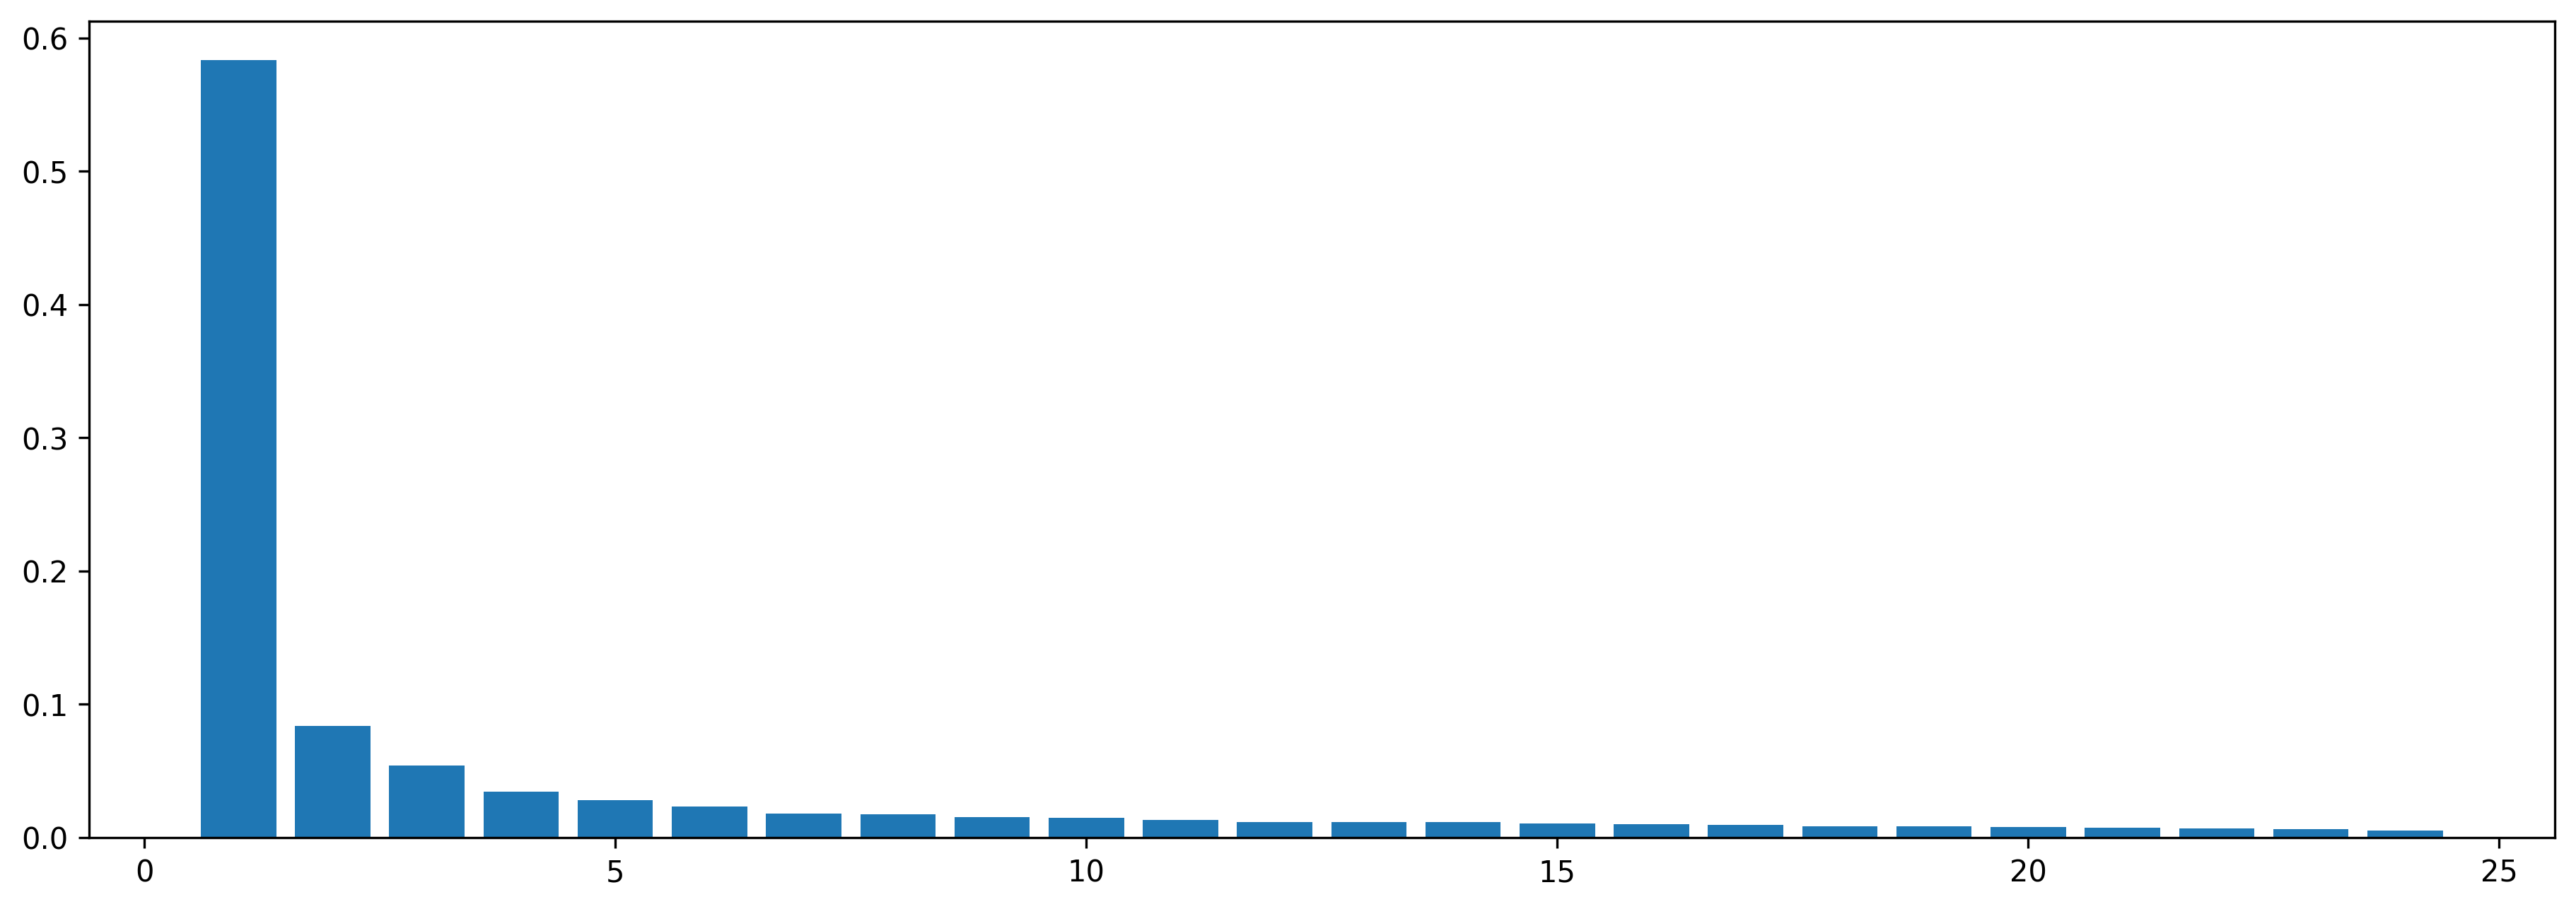

In [32]:
plt.figure(dpi=300,figsize=(15,5))
plt.bar(np.arange(1,len(features)+1),pca.explained_variance_ratio_)

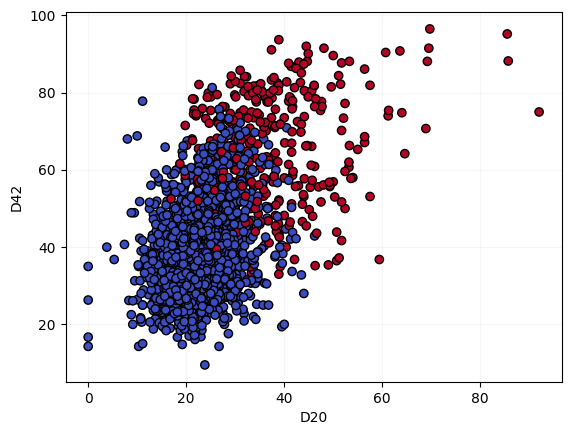

In [33]:
plt.scatter(df['D20'], df['D42'], c=df['Indicação do Padrão de Desempenho'].values, edgecolors='black', cmap='coolwarm')
plt.xlabel('D20')
plt.ylabel('D42')
plt.grid(alpha=0.1)

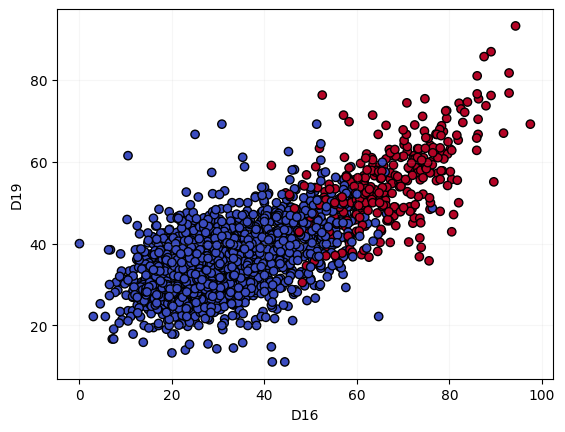

In [34]:
plt.scatter(df['D16'], df['D19'], c=df['Indicação do Padrão de Desempenho'].values, edgecolors='black', cmap='coolwarm')
plt.xlabel('D16')
plt.ylabel('D19')
plt.grid(alpha=0.1)

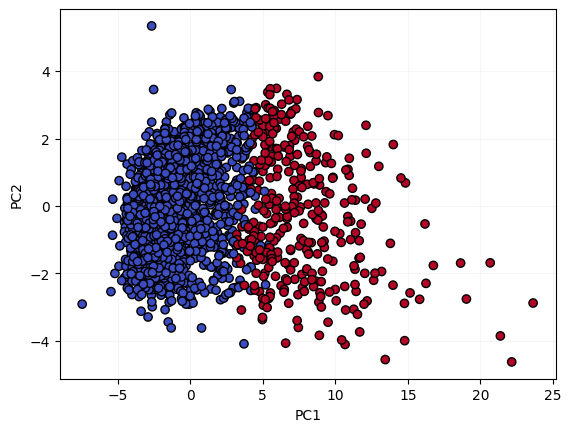

In [35]:
plt.scatter(Xpca[:,0], Xpca[:,1], c=df['Indicação do Padrão de Desempenho'].values, edgecolors='black', cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.1)

# Question 3


In [36]:
df['TARGET']=df['Indicação do Padrão de Desempenho']

In [37]:
df[features]

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D56,D57,D58,D64,D65,D67,D71,D72,D76,D78
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,18.2,50.7,16.7,25.4,27.5,22.8,25.4,28.1,86.4,25.5
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,14.9,45.2,16.5,15.0,22.4,20.3,32.7,21.2,86.2,26.0
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,25.8,69.8,27.0,33.3,25.4,23.4,17.0,37.1,74.6,40.3
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,15.1,68.1,29.5,37.1,28.4,23.5,12.2,28.9,93.8,50.0
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.2,41.7,22.2,21.0,27.2,20.0,17.6,32.1,82.3,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,21.1,52.9,25.6,36.5,30.9,29.5,17.8,27.5,84.1,52.7
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,8.0,35.5,12.1,33.3,35.0,16.7,35.5,29.4,90.9,41.7
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,10.6,51.6,20.0,35.0,20.6,18.3,20.9,18.0,85.5,23.7
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,14.3,60.2,29.0,35.3,18.0,15.1,10.0,27.5,77.4,38.5


In [38]:
# Precissão com dados originais
X=df[features]# dimensoes
y=df['TARGET']# alvo
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=42)
clf=LogisticRegression(random_state=42,max_iter=10000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

accuracy_dados_originais=accuracy_score(y_test,y_pred)

0.982200647249191 0.9290322580645162


# Questão 3 
Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto a um modelo de ML escolhido através do PCA. Faça um gráfico.

In [39]:
# Escolando os dados

from sklearn.preprocessing import StandardScaler
X = df[features]

scaler=StandardScaler()
X_ss=scaler.fit_transform(X)

In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
Xpca=pca.fit_transform(X_ss)


In [41]:
pca.explained_variance_ratio_

array([0.58359094, 0.08348105, 0.05376444, 0.03422109, 0.02795   ,
       0.0230972 , 0.01802735, 0.01753916, 0.01530938, 0.01472902,
       0.01307451, 0.01176163, 0.01146915, 0.01132959, 0.01065824,
       0.00992948, 0.0092526 , 0.00860253, 0.00829686, 0.0078153 ,
       0.00758049, 0.00703275, 0.00635181, 0.00513541])

In [42]:
pca.explained_variance_ratio_.sum()

1.0

Text(0.5, 0, 'COMPONENTE')

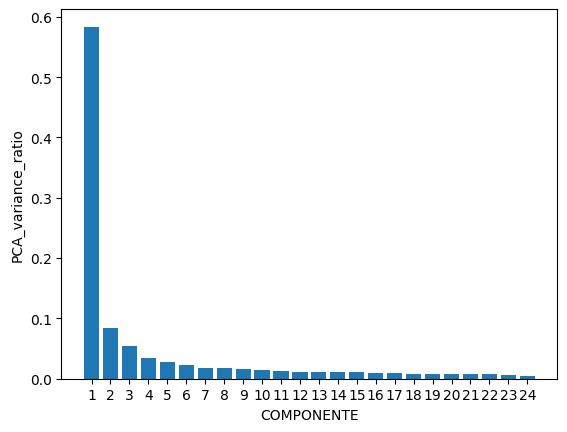

In [43]:
plt.bar(np.arange(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,)
plt.xticks(np.arange(1,len(pca.explained_variance_ratio_)+1),np.arange(1,len(pca.explained_variance_ratio_)+1))
plt.ylabel('PCA_variance_ratio')
plt.xlabel('COMPONENTE')

In [45]:
# Precissão com dados originais
X=Xpca# dimensoes
y=df['TARGET']# alvo
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=42)
clf=LogisticRegression(random_state=42,max_iter=10000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

accuracy_pca=accuracy_score(y_test,y_pred)

0.9854368932038835 0.9419354838709677


In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=None)

y=df['TARGET']# alvo
X=lda.fit_transform(df[features],y)# dimensoes

# Precissão com dados originais
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=42)
clf=LogisticRegression(random_state=42,max_iter=10000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

accuracy_lda=accuracy_score(y_test,y_pred)

0.982200647249191 0.9341317365269461


(0.0, 1.2)

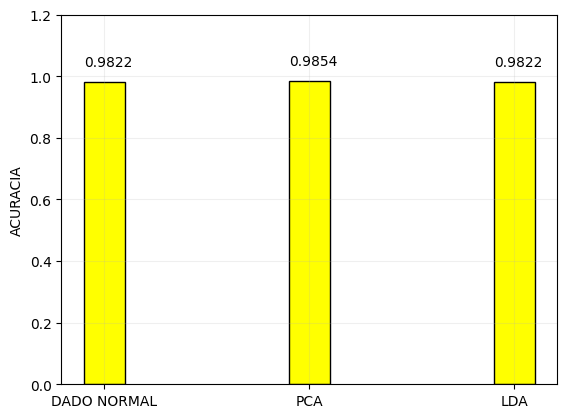

In [57]:
valores=[accuracy_dados_originais,accuracy_pca,accuracy_lda]
nome_modelo=['DADO NORMAL','PCA','LDA']

plt.bar(nome_modelo,valores,edgecolor='black',color='yellow',width=0.2)
plt.grid(alpha=0.2)
plt.ylabel('ACURACIA')
plt.annotate(str(valores[0])[0:6],(0-0.1,valores[0]+0.05))
plt.annotate(str(valores[1])[0:6],(1-0.1,valores[1]+0.05))
plt.annotate(str(valores[2])[0:6],(2-0.1,valores[2]+0.05))
plt.ylim(0,1.2)

# Questão 4

Utilizando o Métodos de Pesos Lineares, identifique a relevância de cada atributo do conjunto de dados em relação a primeira componente principal. Faça um gráfico ( 𝑝𝑙𝑡.𝑏𝑎𝑟 ) onde um eixo identifica o atributo, enquanto o outro identifica o peso associado.

In [46]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(X_ss,Xpca[:,0])
modelo.coef_

array([0.24372872, 0.21648252, 0.20395893, 0.20667877, 0.1853815 ,
       0.17929849, 0.20583056, 0.1518515 , 0.22135615, 0.18489299,
       0.19803851, 0.20870153, 0.21039324, 0.20038352, 0.19787735,
       0.22591834, 0.20793562, 0.21575334, 0.23194828, 0.23328869,
       0.1226122 , 0.21880189, 0.18642174, 0.20305798])

In [47]:
daux = pd.DataFrame({'FEATURE':features,'COEFICIENTE':modelo.coef_}).sort_values('COEFICIENTE',ascending=False)
daux

,FEATURE,COEFICIENTE
0,D16,0.243729
19,D67,0.233289
18,D65,0.231948
15,D57,0.225918
8,D50,0.221356
21,D72,0.218802
1,D19,0.216483
17,D64,0.215753
12,D54,0.210393
11,D53,0.208702


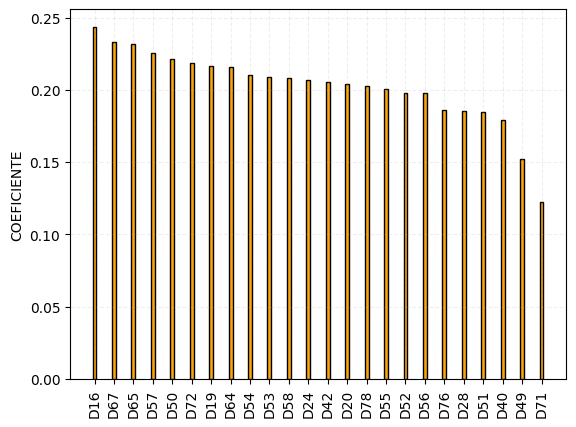

In [48]:
plt.bar(daux['FEATURE'],daux['COEFICIENTE'],edgecolor='black',color='orange',width=0.2)
plt.xticks(rotation=90)
plt.ylabel('COEFICIENTE')
plt.grid(alpha=0.2,ls='--')